# IPL Data Analysis (Advanced Task)

## Objective
The objective of this project is to perform exploratory data analysis (EDA) on Indian Premier League (IPL) match data to identify trends, team performance patterns, toss impact, and venue-based insights using data visualization techniques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load IPL dataset
df = pd.read_excel('/content/IPL sample data.xlsx')

# Preview data
df.head()


,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium


In [3]:
# Display all column names clearly
list(df.columns)



['Pick',
 'Y->',
 'Clean Pick',
 'N->',
 'Fumble',
 'C->',
 'Catch',
 'DC->',
 'Dropped Catch',
 'S->',
 'Stumping',
 'Unnamed: 11',
 'Unnamed: 12']

In [4]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# Check columns again
list(df.columns)


['Pick',
 'Y->',
 'Clean Pick',
 'N->',
 'Fumble',
 'C->',
 'Catch',
 'DC->',
 'Dropped Catch',
 'S->',
 'Stumping']

In [5]:
# Check unique values in each important column
for col in ['Clean Pick', 'Fumble', 'Catch', 'Dropped Catch', 'Stumping']:
    print(col, df[col].unique())


Clean Pick ['Good Throw' nan 'Innings' 1 'Clean Picks (CP)' 2 3 4
 'PS=(CP×WCP\u200b)+(GT×WGT\u200b)+(C×WC\u200b)+(DC×WDC\u200b)+(ST×WST\u200b)+(RO×WRO\u200b)+(MRO×WMRO\u200b)+(DH×WDH\u200b)+RS'
 'Where W represents the weight assigned to each action, and the metrics are:'
 'CP: Clean Picks is worth 1 point.' 'GT: Good Throws is worth 1 point.'
 'C: Catches is worth 3 points.' 'DC: Dropped Catches subtracts 3 points.'
 'ST: Stumpings is worth 3 points.' 'RO: Run Outs is worth 3 points.'
 'MRO: Missed Run Outs subtracts 2 points.'
 'DH: Direct Hits is worth 2 points.'
 'RS: Runs Saved are added to the score as is.'
 'PS=(2×1)+(1×1)+(1×3)−(0×3)+(0×3)+(0×3)−(0×2)+(1×2)+2'
 'PS=2+1+3+0+0+0−0+2+2' 'PS=10'
 'PS=(1×1)+(2×1)+(0×3)−(1×3)+(0×3)+(1×3)−(0×2)+(0×2)−1'
 'PS=1+2+0−3+0+3−0+0−1' 'PS=2'
 'PS=(3×1)+(1×1)+(2×3)−(0×3)+(0×3)+(0×3)−(1×2)+(0×2)+3'
 'PS=3+1+6+0+0+0−2+0+3' 'PS=11'
 'PS=(2×1)+(3×1)+(1×3)−(0×3)+(1×3)+(0×3)−(0×2)+(0×2)+0'
 'PS=2+3+3+0+3+0−0+0+0'
 'PS=(1×1)+(2×1)+(1×3)−(0×3)+(0×3)+

In [6]:
# Replace Y/N with 1/0
df['Clean Pick'] = df['Clean Pick'].replace({'Y': 1, 'N': 0})
df['Fumble'] = df['Fumble'].replace({'Y': 1, 'N': 0})
df['Catch'] = df['Catch'].replace({'Y': 1, 'N': 0})
df['Dropped Catch'] = df['Dropped Catch'].replace({'Y': 1, 'N': 0})
df['Stumping'] = df['Stumping'].replace({'Y': 1, 'N': 0})

# Fill missing values with 0
df[['Clean Pick','Fumble','Catch','Dropped Catch','Stumping']] = df[
    ['Clean Pick','Fumble','Catch','Dropped Catch','Stumping']
].fillna(0)


In [7]:
# Verify numeric conversion
df[['Clean Pick','Fumble','Catch','Dropped Catch','Stumping']].head()


,Clean Pick,Fumble,Catch,Dropped Catch,Stumping
0,Good Throw,Bad throw,Dirct Hit,Run Out,Missed Runout
1,0,0,0,0,0
2,0,0,0,0,0
3,Innings,Player Name,Position,Throw,Overcount
4,1,Rilee russouw,Short mid wicket,0,1


In [9]:
# Calculate total counts for each fielding action
fielding_totals = {
    'Clean Picks': df['Clean Pick'].apply(pd.to_numeric, errors='coerce').fillna(0).sum(),
    'Fumbles': df['Fumble'].apply(pd.to_numeric, errors='coerce').fillna(0).sum(),
    'Catches': df['Catch'].apply(pd.to_numeric, errors='coerce').fillna(0).sum(),
    'Dropped Catches': df['Dropped Catch'].apply(pd.to_numeric, errors='coerce').fillna(0).sum(),
    'Stumpings': df['Stumping'].apply(pd.to_numeric, errors='coerce').fillna(0).sum()
}

fielding_totals

{'Clean Picks': np.float64(28.0),
 'Fumbles': np.float64(6.0),
 'Catches': np.float64(1.0),
 'Dropped Catches': np.float64(7.0),
 'Stumpings': np.float64(25.0)}

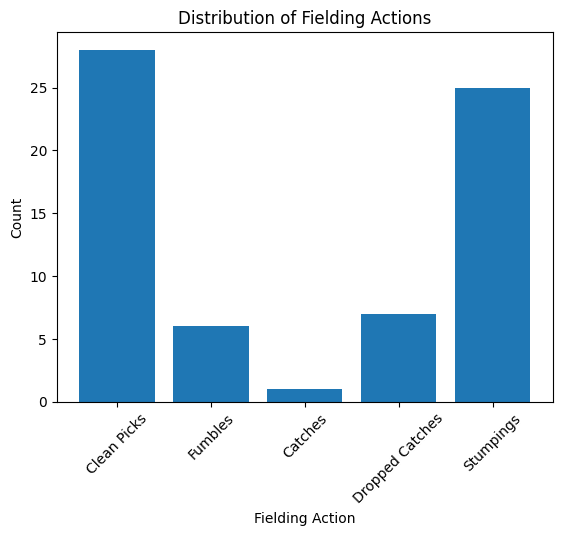

In [10]:
plt.figure()
plt.bar(fielding_totals.keys(), fielding_totals.values())
plt.xlabel("Fielding Action")
plt.ylabel("Count")
plt.title("Distribution of Fielding Actions")
plt.xticks(rotation=45)
plt.show()


In [11]:
performance_score = (
    fielding_totals['Clean Picks']
    + fielding_totals['Catches']
    + fielding_totals['Stumpings']
    - fielding_totals['Fumbles']
    - fielding_totals['Dropped Catches']
)

performance_score


np.float64(41.0)